**This is the primary notebook to get to know our data and be familiar with it**
*Now let's import the necessary libraries*


In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from pathlib import Path
import random
from collections import Counter
# for better plots
sns.set_palette('husl')
# for reproductibilty
random.seed(42)
np.random.seed(42)

print("librabies imported sucessfully")



librabies imported sucessfully


*Now let's define all the paths*

In [4]:
base_dir = Path('../data/raw/cell_images')
parasited_dir = base_dir / 'Parasitized'
uninfected_dir = base_dir / 'Uninfected'
 #Verify paths exist
print("Checking if directories exist...")
print(f"Base directory exists: {base_dir.exists()}")
print(f"Parasitized directory exists: {parasited_dir.exists()}")
print(f"Uninfected directory exists: {uninfected_dir.exists()}")
# List first few files to verify
if parasited_dir.exists():
    sample_files = list(parasited_dir.glob('*.png'))[:3]
    print(f"\nSample files in Parasitized folder:")
    for f in sample_files:
        print(f"  - {f.name}")



Checking if directories exist...
Base directory exists: True
Parasitized directory exists: True
Uninfected directory exists: True

Sample files in Parasitized folder:
  - C100P61ThinF_IMG_20150918_144104_cell_162.png
  - C100P61ThinF_IMG_20150918_144104_cell_163.png
  - C100P61ThinF_IMG_20150918_144104_cell_164.png


*Count the images in each class*

In [6]:
def count_images_in_directory(directory):
    png_files = list(directory.glob('*.png'))
    jpg_files = list(directory.glob('*.jpg'))
    jpeg_files = list(directory.glob('*.jpeg'))
    total = len(png_files) + len(jpg_files) + len(jpeg_files)
    return total
print("=" * 50)
print("DATASET STATISTICS")
print("="*50)
print(f"Parasitized images: {count_images_in_directory(parasited_dir):,}")
print(f"Uninfected images:  {count_images_in_directory(uninfected_dir):,}")
# The total images from kaggle of this dataset is 27,558 = 13,779 * 2
# So there is no class imbalance


DATASET STATISTICS
Parasitized images: 13,779
Uninfected images:  13,779


*Now let's visualize thuis distribution*

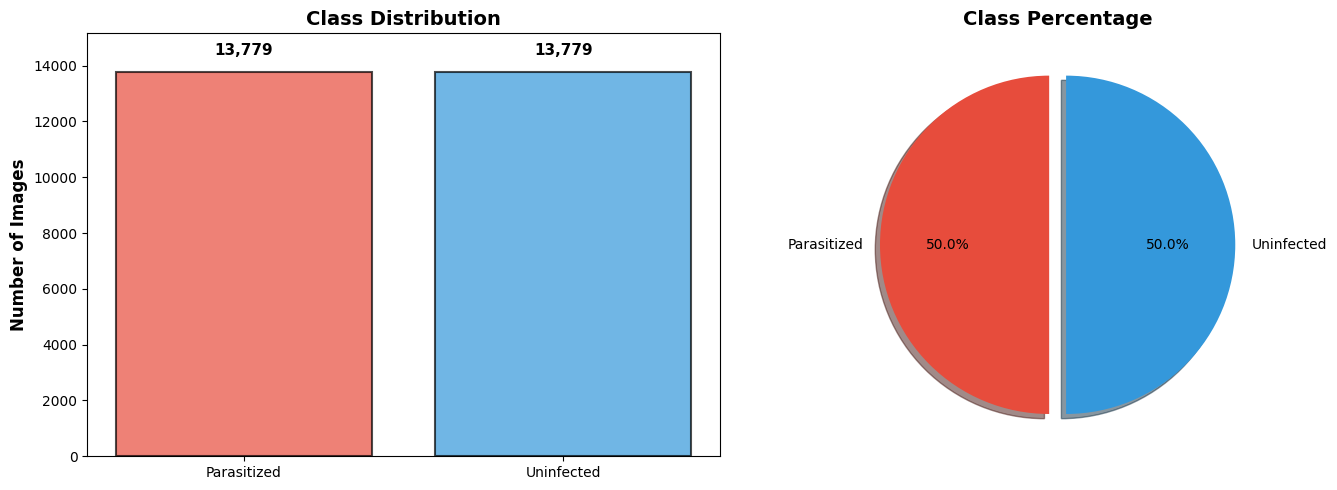

✅ Plot saved to: results/class_distribution.png


In [7]:
# Cell 4: Visualize Class Distribution
"""
Create a bar chart showing the distribution of classes
"""

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
classes = ['Parasitized', 'Uninfected']
parasitized_count = count_images_in_directory(parasited_dir)
uninfected_count = count_images_in_directory(uninfected_dir)
counts = [parasitized_count, uninfected_count]
colors = ['#e74c3c', '#3498db']

axes[0].bar(classes, counts, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Number of Images', fontsize=12, fontweight='bold')
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, max(counts) * 1.1)

# Add count labels on bars
for i, (cls, count) in enumerate(zip(classes, counts)):
    axes[0].text(i, count + 500, f'{count:,}', 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
axes[1].pie(counts, labels=classes, colors=colors, autopct='%1.1f%%',
           startangle=90, explode=(0.05, 0.05), shadow=True)
axes[1].set_title('Class Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Plot saved to: results/class_distribution.png")

**Now let's Check the dimensions of images to understand their sizes This helps us decide what size to resize them to**

In [15]:
def get_image_dimensions(directory,num_samples = 1000):
    # sample random images and het their dimesnions
    # Get all image files
    image_files = list(directory.glob('*.png'))
    # Sample random umages 
    sample_size = min(num_samples,len(image_files))
    sampled_files = random.sample(image_files,sample_size)
    dimensions = []
    for img_path in sampled_files:
        try:
            with Image.open(img_path) as img:
                width,height = img.size
                dimensions.append({
                    'width':width,
                    'height':height,
                    'aspect_ratio': width / height
                })
        except Exception as e:
            print(f"Error reading {img_path}: {e}")
    return dimensions
print("Analyzing image dimensions (sampling 500 images from each class)...")
print("This may take a moment...\n")

# Analyze both classes
parasitized_dims = get_image_dimensions(parasited_dir, num_samples=1000)
uninfected_dims = get_image_dimensions(uninfected_dir, num_samples=1000)

# Convert to DataFrames for easier analysis
df_parasitized = pd.DataFrame(parasitized_dims)
df_uninfected = pd.DataFrame(uninfected_dims)

print("=" * 50)
print("PARASITIZED IMAGES - Dimension Statistics")
print("=" * 50)
print(df_parasitized.describe())

print("\n" + "=" * 50)
print("UNINFECTED IMAGES - Dimension Statistics")
print("=" * 50)
print(df_uninfected.describe())


Analyzing image dimensions (sampling 500 images from each class)...
This may take a moment...

PARASITIZED IMAGES - Dimension Statistics
             width       height  aspect_ratio
count  1000.000000  1000.000000   1000.000000
mean    134.341000   134.311000      1.009901
std      21.535052    21.460215      0.142280
min      79.000000    73.000000      0.539419
25%     121.000000   121.000000      0.918919
50%     133.000000   133.000000      1.000000
75%     145.000000   145.000000      1.082616
max     247.000000   247.000000      1.721805

UNINFECTED IMAGES - Dimension Statistics
             width       height  aspect_ratio
count  1000.000000  1000.000000   1000.000000
mean    131.056000   131.854000      1.004556
std      19.378658    19.613398      0.146536
min      79.000000    58.000000      0.517588
25%     118.000000   118.000000      0.919462
50%     130.000000   130.000000      1.000000
75%     142.000000   142.000000      1.082569
max     238.000000   235.000000      1.

**Visualize Image Dimensions Distribution**

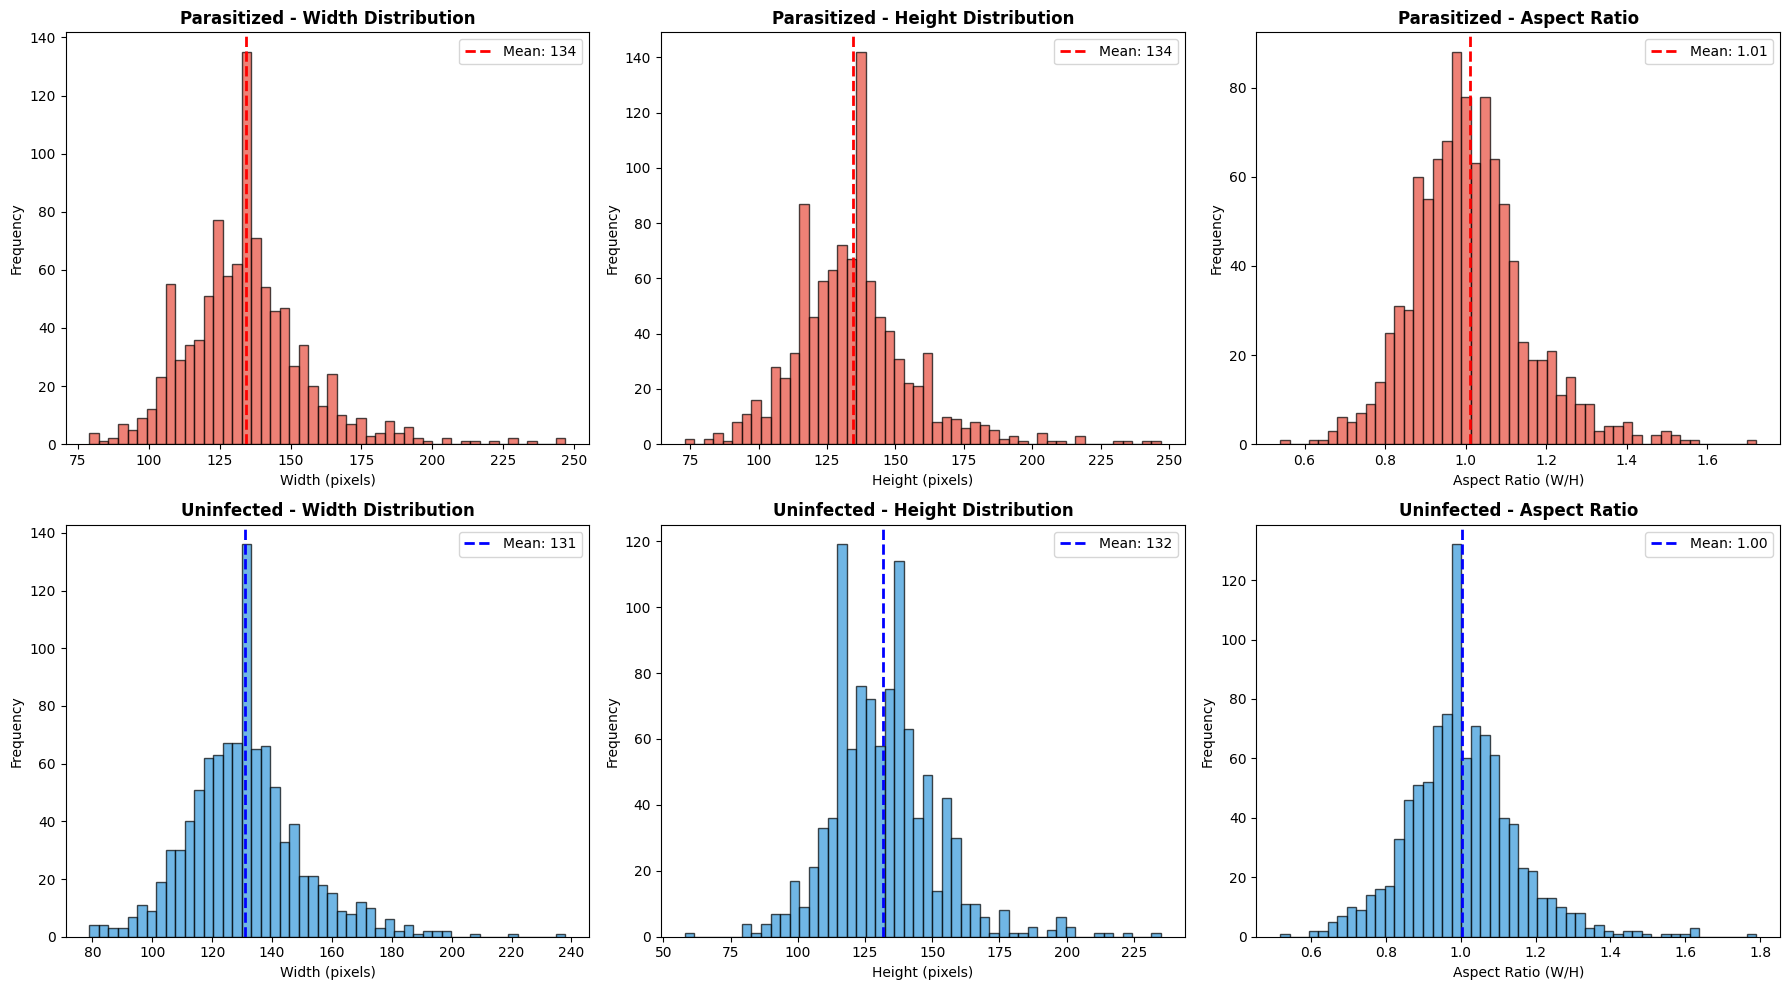

✅ Plot saved to: results/dimension_distributions.png


In [16]:
# Cell 6: Visualize Image Dimensions Distribution
"""
Plot histograms of image widths and heights
"""

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Parasitized - Width
axes[0, 0].hist(df_parasitized['width'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Parasitized - Width Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Width (pixels)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_parasitized['width'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f'Mean: {df_parasitized["width"].mean():.0f}')
axes[0, 0].legend()

# Parasitized - Height
axes[0, 1].hist(df_parasitized['height'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Parasitized - Height Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Height (pixels)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df_parasitized['height'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f'Mean: {df_parasitized["height"].mean():.0f}')
axes[0, 1].legend()

# Parasitized - Aspect Ratio
axes[0, 2].hist(df_parasitized['aspect_ratio'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Parasitized - Aspect Ratio', fontweight='bold')
axes[0, 2].set_xlabel('Aspect Ratio (W/H)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].axvline(df_parasitized['aspect_ratio'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f'Mean: {df_parasitized["aspect_ratio"].mean():.2f}')
axes[0, 2].legend()

# Uninfected - Width
axes[1, 0].hist(df_uninfected['width'], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Uninfected - Width Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Width (pixels)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df_uninfected['width'].mean(), color='blue', 
                   linestyle='--', linewidth=2, label=f'Mean: {df_uninfected["width"].mean():.0f}')
axes[1, 0].legend()

# Uninfected - Height
axes[1, 1].hist(df_uninfected['height'], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Uninfected - Height Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Height (pixels)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(df_uninfected['height'].mean(), color='blue', 
                   linestyle='--', linewidth=2, label=f'Mean: {df_uninfected["height"].mean():.0f}')
axes[1, 1].legend()

# Uninfected - Aspect Ratio
axes[1, 2].hist(df_uninfected['aspect_ratio'], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
axes[1, 2].set_title('Uninfected - Aspect Ratio', fontweight='bold')
axes[1, 2].set_xlabel('Aspect Ratio (W/H)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].axvline(df_uninfected['aspect_ratio'].mean(), color='blue', 
                   linestyle='--', linewidth=2, label=f'Mean: {df_uninfected["aspect_ratio"].mean():.2f}')
axes[1, 2].legend()

plt.tight_layout()
plt.savefig('../results/dimension_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Plot saved to: results/dimension_distributions.png")

*Now we need to resize the images for a better work*

In [18]:
# Calculate average dimensions
avg_width = (df_parasitized['width'].mean() + df_uninfected['width'].mean()) / 2
avg_height = (df_parasitized['height'].mean() + df_uninfected['height'].mean()) / 2
print("="*60)
print("RECOMMEND IMAGE SIZES FOR MODEL")
print("=" * 60)
print(f"Average width across all images:  {avg_width:.0f} pixels")
print(f"Average height across all images: {avg_height:.0f} pixels")
print()

# Recommend square sizes (common for CNNs)
recommended_sizes = [64, 96, 128, 150, 224]
print("Common sizes used in deep learning:")
for size in recommended_sizes:
    print(f"  • {size}x{size} pixels")

print()
print(" RECOMMENDATION:")
print("  For this dataset,  150x150 would be a good balance")
print("  between preserving details and computational efficiency.")
print("  Start with 150x150 for faster training and efficiency")
print("=" * 60)

RECOMMEND IMAGE SIZES FOR MODEL
Average width across all images:  133 pixels
Average height across all images: 133 pixels

Common sizes used in deep learning:
  • 64x64 pixels
  • 96x96 pixels
  • 128x128 pixels
  • 150x150 pixels
  • 224x224 pixels

💡 RECOMMENDATION:
   For this dataset, 128x128 or 150x150 would be a good balance
   between preserving details and computational efficiency.
   Start with 128x128 for faster training, increase if needed.


Displaying sample images from both classes...



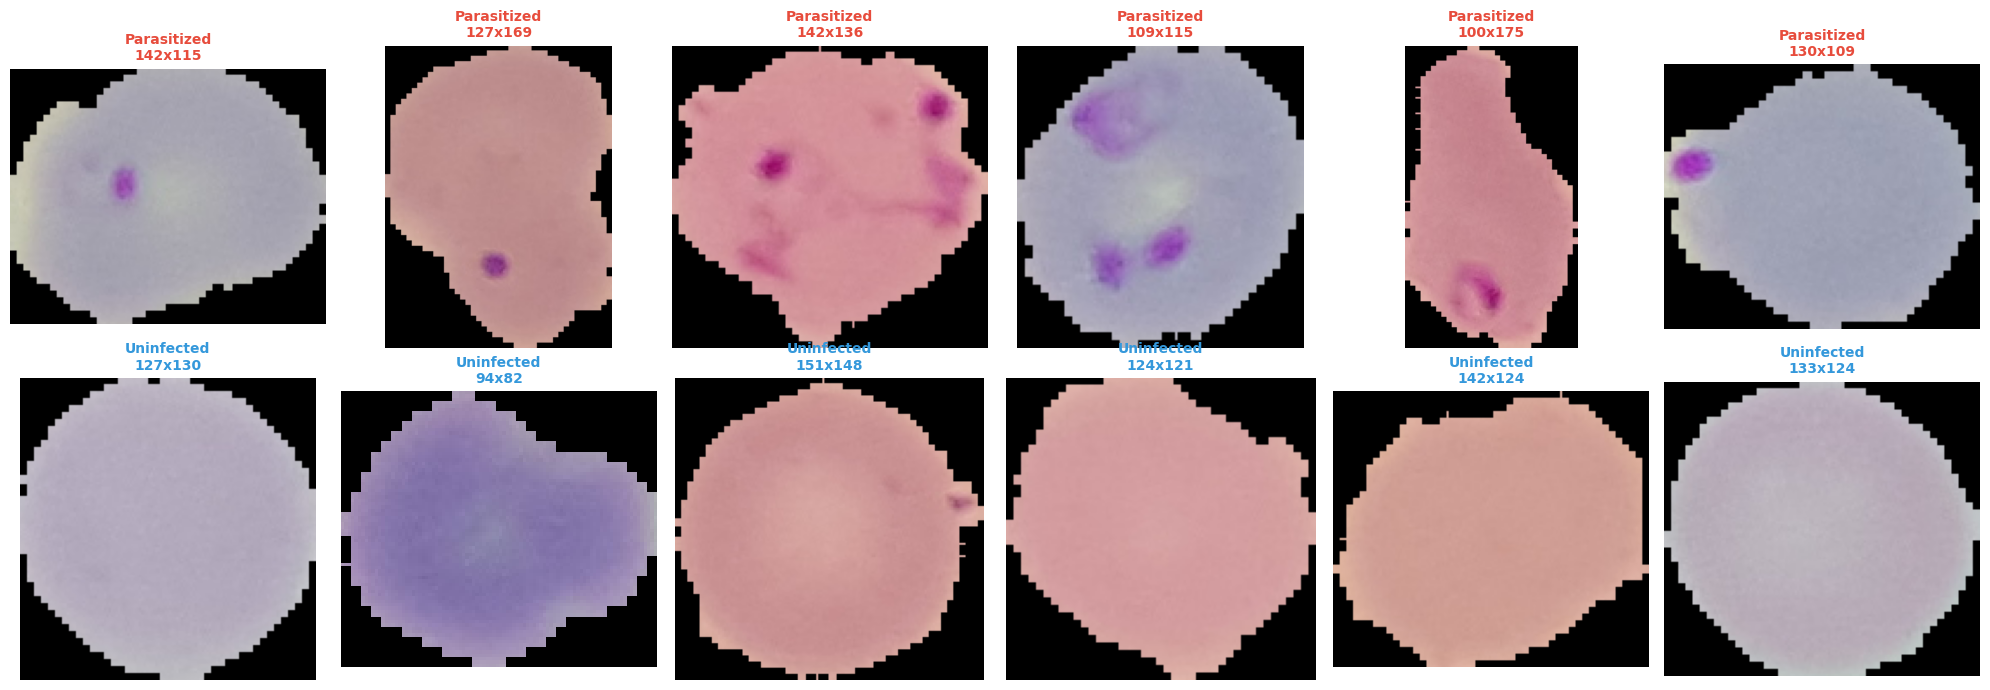

✅ Plot saved to: results/sample_images.png


In [20]:
# Cell 8: Visualize Sample Images
"""
Display sample images from both classes
This helps us understand what the images look like
"""

def plot_sample_images(parasitized_dir, uninfected_dir, num_samples=6):
    """
    Plot sample images from both classes
    """
    # Get random samples
    parasitized_images = random.sample(list(parasitized_dir.glob('*.png')), num_samples)
    uninfected_images = random.sample(list(uninfected_dir.glob('*.png')), num_samples)
    
    # Create figure
    fig, axes = plt.subplots(2, num_samples, figsize=(20, 7))
    
    # Plot parasitized images
    for idx, img_path in enumerate(parasitized_images):
        img = Image.open(img_path)
        axes[0, idx].imshow(img)
        axes[0, idx].axis('off')
        axes[0, idx].set_title(f'Parasitized\n{img.size[0]}x{img.size[1]}', 
                              fontsize=10, color='#e74c3c', fontweight='bold')
    
    # Plot uninfected images
    for idx, img_path in enumerate(uninfected_images):
        img = Image.open(img_path)
        axes[1, idx].imshow(img)
        axes[1, idx].axis('off')
        axes[1, idx].set_title(f'Uninfected\n{img.size[0]}x{img.size[1]}', 
                              fontsize=10, color='#3498db', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../results/sample_images.png', dpi=300, bbox_inches='tight')
    plt.show()

print("Displaying sample images from both classes...\n")
plot_sample_images(parasited_dir,uninfected_dir, num_samples=6)
print("Plot saved to: results/sample_images.png")

**Now let's analyze the color distributions for these images**

In [22]:

"""
Analyze the color channels (RGB) distribution
This can help us decide on normalization strategies
"""

def analyze_color_channels(directory, num_samples=500):
    """
    Sample images and analyze their RGB channel distributions
    """
    image_files = list(directory.glob('*.png'))
    sampled_files = random.sample(image_files, min(num_samples, len(image_files)))
    
    r_values, g_values, b_values = [], [], []
    
    for img_path in sampled_files:
        try:
            img = Image.open(img_path)
            img_array = np.array(img)
            
            # Get mean values for each channel
            r_values.append(img_array[:, :, 0].mean())
            g_values.append(img_array[:, :, 1].mean())
            b_values.append(img_array[:, :, 2].mean())
        except Exception as e:
            continue
    
    return {
        'red': r_values,
        'green': g_values,
        'blue': b_values
    }

print("Analyzing color distributions (sampling 500 images from each class)...")
print("This may take a moment...\n")

parasitized_colors = analyze_color_channels(parasited_dir)
uninfected_colors = analyze_color_channels(uninfected_dir)

# Calculate statistics
print("=" * 60)
print("COLOR CHANNEL STATISTICS")
print("=" * 60)

for color in ['red', 'green', 'blue']:
    para_mean = np.mean(parasitized_colors[color])
    para_std = np.std(parasitized_colors[color])
    uninf_mean = np.mean(uninfected_colors[color])
    uninf_std = np.std(uninfected_colors[color])
    
    print(f"\n{color.upper()} Channel:")
    print(f"  Parasitized - Mean: {para_mean:.2f}, Std: {para_std:.2f}")
    print(f"  Uninfected  - Mean: {uninf_mean:.2f}, Std: {uninf_std:.2f}")

Analyzing color distributions (sampling 500 images from each class)...
This may take a moment...

COLOR CHANNEL STATISTICS

RED Channel:
  Parasitized - Mean: 135.18, Std: 17.41
  Uninfected  - Mean: 136.88, Std: 15.02

GREEN Channel:
  Parasitized - Mean: 103.79, Std: 14.82
  Uninfected  - Mean: 113.40, Std: 13.43

BLUE Channel:
  Parasitized - Mean: 113.11, Std: 16.11
  Uninfected  - Mean: 119.33, Std: 16.44


*Now for the visualization*

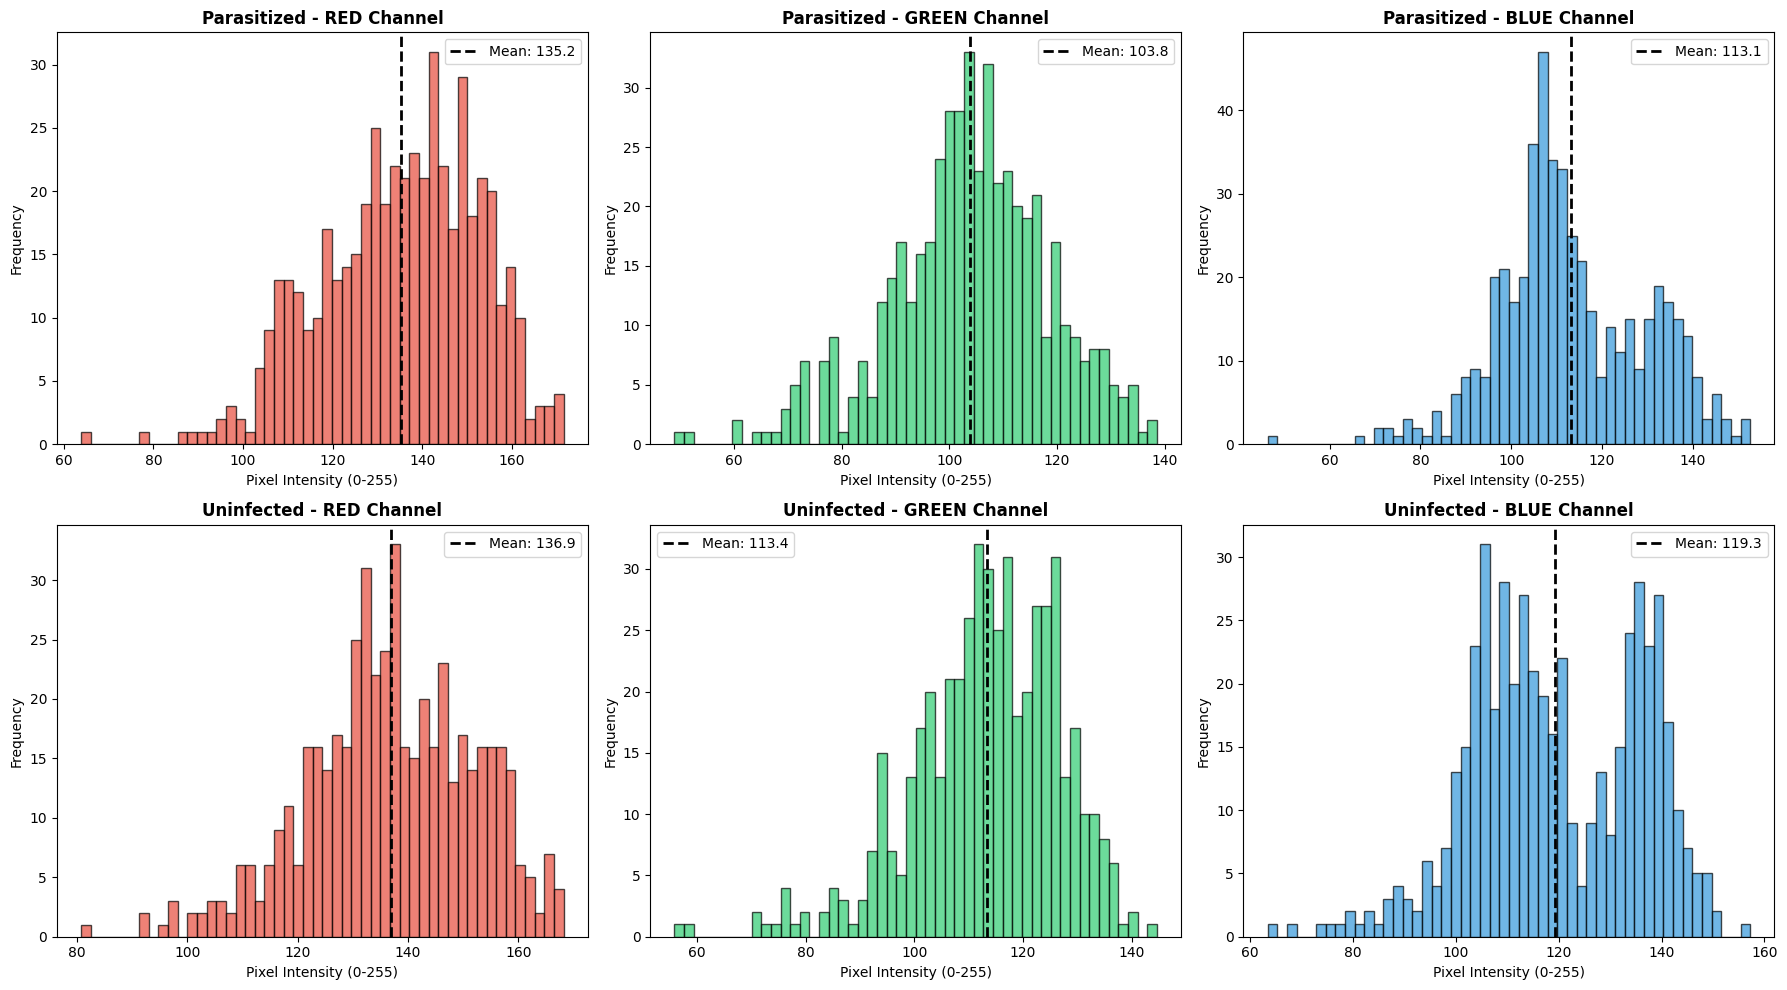

✅ Plot saved to: results/color_distributions.png


In [23]:

"""
Plot histograms of RGB channels for both classes
"""

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

colors_rgb = ['red', 'green', 'blue']
colors_hex = ['#e74c3c', '#2ecc71', '#3498db']

# Parasitized
for idx, (color, hex_color) in enumerate(zip(colors_rgb, colors_hex)):
    axes[0, idx].hist(parasitized_colors[color], bins=50, color=hex_color, 
                     alpha=0.7, edgecolor='black')
    axes[0, idx].set_title(f'Parasitized - {color.upper()} Channel', fontweight='bold')
    axes[0, idx].set_xlabel('Pixel Intensity (0-255)')
    axes[0, idx].set_ylabel('Frequency')
    axes[0, idx].axvline(np.mean(parasitized_colors[color]), color='black', 
                        linestyle='--', linewidth=2, 
                        label=f'Mean: {np.mean(parasitized_colors[color]):.1f}')
    axes[0, idx].legend()

# Uninfected
for idx, (color, hex_color) in enumerate(zip(colors_rgb, colors_hex)):
    axes[1, idx].hist(uninfected_colors[color], bins=50, color=hex_color, 
                     alpha=0.7, edgecolor='black')
    axes[1, idx].set_title(f'Uninfected - {color.upper()} Channel', fontweight='bold')
    axes[1, idx].set_xlabel('Pixel Intensity (0-255)')
    axes[1, idx].set_ylabel('Frequency')
    axes[1, idx].axvline(np.mean(uninfected_colors[color]), color='black', 
                        linestyle='--', linewidth=2, 
                        label=f'Mean: {np.mean(uninfected_colors[color]):.1f}')
    axes[1, idx].legend()

plt.tight_layout()
plt.savefig('../results/color_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Plot saved to: results/color_distributions.png")

**CONCLUSION AND SUMMARY**

In [24]:

"""
Summarize findings and recommend next steps
"""

print("=" * 70)
print("DATA EXPLORATION SUMMARY")
print("=" * 70)
print()
print(" Dataset Overview:")
print(f"   • Total images: 27,558")
print(f"   • Parasitized: {parasitized_count:,} 50%")
print(f"   • Uninfected: {uninfected_count:,} 50%")
print(f"   • Class balance: {'Good'}")
print()
print(" Image Characteristics:")
print(f"   • Average size: ~{avg_width:.0f}x{avg_height:.0f} pixels")
print(f"   • Recommended resize:  150x150")
print(f"   • Color space: RGB")
print()
print(" Plots Generated:")
print("   • class_distribution.png")
print("   • dimension_distributions.png")
print("   • sample_images.png")
print("   • color_distributions.png")
print()
print(" Next Steps:")
print("   1. Split data into train/val/test sets (70/15/15)")
print("   2. Apply data augmentation during training")
print("   3. Normalize using ImageNet stats or calculated means")
print("   4. Build and train CNN model")
print()
print("=" * 70)

DATA EXPLORATION SUMMARY

 Dataset Overview:
   • Total images: 27,558
   • Parasitized: 13,779 50%
   • Uninfected: 13,779 50%
   • Class balance: Good

 Image Characteristics:
   • Average size: ~133x133 pixels
   • Recommended resize: 128x128 or 150x150
   • Color space: RGB

 Plots Generated:
   • class_distribution.png
   • dimension_distributions.png
   • sample_images.png
   • color_distributions.png

 Next Steps:
   1. Split data into train/val/test sets (70/15/15)
   2. Apply data augmentation during training
   3. Normalize using ImageNet stats or calculated means
   4. Build and train CNN model

